# Assignment 7: analyzing a messy dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading in the data
Set the variable `sales_df` to a Pandas DataFrame from the `Real_Estate_Sales_2001-2020_GL.csv` file and display the first 5 rows. <br /> **Note:** This is a fairly large dataset, so when you call the function to read in the file, add the argument `low_memory=False`.

In [2]:
sales_df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")
sales_df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


## Cleaning up the data
For our analysis, we will want to do a breakdown of real estate sales by **year of sale**, **town**, **assessed value**, **sale amount**, and **property type**.

1. Removing all the unnecessary columns from `sales_df`. **Hint:** we are interested in year of *sale*, not the year the property was *listed*.
2. Change the dtypes for `Assessed Value` and `Sale Amount` to `int`.

In [3]:
sales_df = sales_df.drop(columns=["Serial Number", "Address", "Sales Ratio", "Residential Type", "List Year", "Non Use Code", "Assessor Remarks", "OPM remarks", "Location"])
sales_df["Assessed Value"] = sales_df["Assessed Value"].astype(int)
sales_df["Sale Amount"] = sales_df["Sale Amount"].astype(int)

sales_df.head()

,Date Recorded,Town,Assessed Value,Sale Amount,Property Type
0,09/13/2021,Ansonia,150500,325000,Commercial
1,10/02/2020,Ashford,253000,430000,Residential
2,03/09/2021,Avon,130400,179900,Residential
3,04/13/2021,Avon,619290,890000,Residential
4,07/02/2021,Avon,862330,1447500,Residential


Display how many values in each column are `NaN`. This does not need to be saved as a variable. **Hint:** a function that results in a boolean can be chained with the `sum()` function to get a count.

In [4]:
sales_df.isna().sum()

Date Recorded          2
Town                   0
Assessed Value         0
Sale Amount            0
Property Type     382446
dtype: int64

We need to extract the year the property was sold.
1. Remove any row with a `NaN`.
2. Set the variable `year_sold` to a list of years (as integers) extracted from the `Date Recorded` column.
3. Add a new column named `Year Sold` for those data.

In [5]:
sales_df = sales_df.dropna()
sales_df["Year Sold"] = [date[-4:] for date in sales_df["Date Recorded"]]

sales_df.head()

,Date Recorded,Town,Assessed Value,Sale Amount,Property Type,Year Sold
0,09/13/2021,Ansonia,150500,325000,Commercial,2021
1,10/02/2020,Ashford,253000,430000,Residential,2020
2,03/09/2021,Avon,130400,179900,Residential,2021
3,04/13/2021,Avon,619290,890000,Residential,2021
4,07/02/2021,Avon,862330,1447500,Residential,2021


Let's get an overview of the `Sale Amount` data. Use the Seaborn package to create a scatter plot of `Sale Amount` as a function of `Year Sold`.

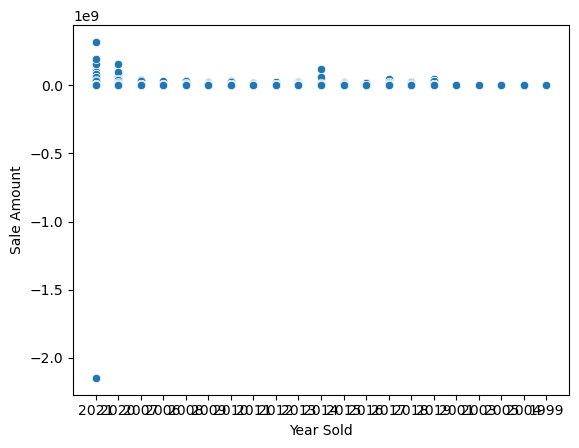

In [6]:
sns.scatterplot(x="Year Sold", y="Sale Amount", data=sales_df)

plt.show()

The data appear squashed because of an outlier. Display the outliers by returning rows from `sales_df` that have `Sale Amount` values **greater than 1e9**. You do not need to save this as a new variable

In [7]:
#For some reason the large sale amount went negative
sales_df[sales_df["Sale Amount"] < 0]

,Date Recorded,Town,Assessed Value,Sale Amount,Property Type,Year Sold
59835,08/19/2021,Willington,2238530,-2147483648,Apartments,2021


Let's remove the outlier and then calculate the average property sale price by year since the housing market crash in 2008.
1. Remove the outlier from `sales_df`.
2. Set a new variable `means_df` to a DataFrame containing the mean sale and assessment values by year.
3. Using Matplotlib, create a single figure with two lineplots:
    - Grey line plot with circle markers of mean assessment value by year from 2008 to 2021
    - Steelblue line plot with square markers of mean sale price by year from 2008 to 2021
    - Title the graph "Comparison of Average Property Values and Sale Prices from 2008 to 2021"
    - Include x- and y-axis labels
    - Include a legend with labels tht correspond to the column headers

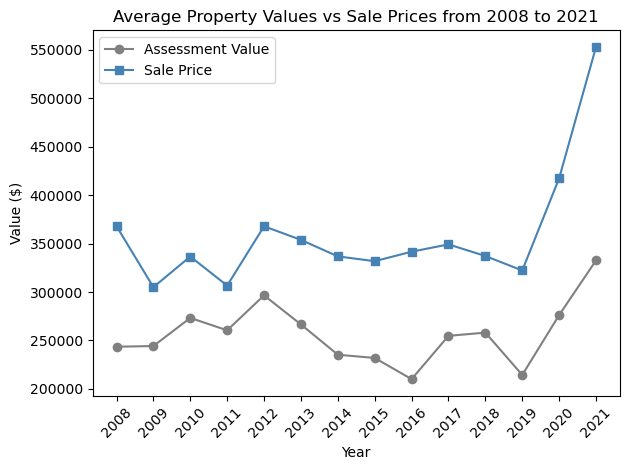

In [8]:
sales_df = sales_df[sales_df["Sale Amount"] > 0]
means_df = sales_df[["Sale Amount", "Assessed Value"]].groupby(sales_df["Year Sold"]).mean()

means_df = means_df[means_df.index.astype(int) >= 2008]

plt.plot(means_df.index, means_df['Assessed Value'], color='grey', marker='o', label='Assessment Value')
plt.plot(means_df.index, means_df['Sale Amount'], color='steelblue', marker='s', label='Sale Price')

plt.title("Average Property Values vs Sale Prices from 2008 to 2021")
plt.xlabel("Year")
plt.ylabel("Value ($)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()